<a href="https://colab.research.google.com/github/melltl/giras_dash/blob/main/dash_giras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import ast
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df=pd.read_csv('Amazon Sale Report.csv')

<ipython-input-178-3b97f4623f3a>:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Amazon Sale Report.csv')


In [ ]:
#slide bar que filtre a quantidade de produtos vendidos por dia

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

<Axes: ylabel='Amount'>

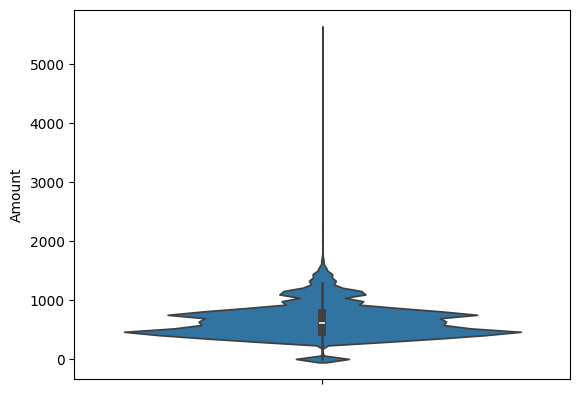

In [ ]:
sns.violinplot(df.Amount)

In [ ]:
df['Date']=pd.to_datetime(df['Date'])

<ipython-input-180-182e23b44254>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date']=pd.to_datetime(df['Date'])


In [ ]:
# 1. Substituir valores NaN na coluna 'Courier Status' por 'unknow'
df['Courier Status'].fillna('unknow', inplace=True)

# 2. Substituir valores NaN na coluna 'currency' por 'unknow'
df['currency'].fillna('unknow', inplace=True)

# 3. Substituir valores NaN na coluna 'Amount' pela média da categoria
# Supondo que a coluna 'categoria' é a coluna pela qual será calculada a média
df['Amount'] = df.groupby('Category')['Amount'].transform(lambda x: x.fillna(x.mean()))

# 4. Transformar '#promotion_id' em True (quando houver ID) e False (quando não houver ID)
df['promotion-ids'] = df['promotion-ids'].notna()

# 5. Dropar as colunas 'fufilled by' e 'unnamed'
df.drop(columns=['fulfilled-by', 'Unnamed: 22','SKU'], inplace=True)

# Exibir o DataFrame atualizado
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               128975 non-null  int64         
 1   Order ID            128975 non-null  object        
 2   Date                128975 non-null  datetime64[ns]
 3   Status              128975 non-null  object        
 4   Fulfilment          128975 non-null  object        
 5   Sales Channel       128975 non-null  object        
 6   ship-service-level  128975 non-null  object        
 7   Style               128975 non-null  object        
 8   SKU                 128975 non-null  object        
 9   Category            128975 non-null  object        
 10  Size                128975 non-null  object        
 11  ASIN                128975 non-null  object        
 12  Courier Status      128975 non-null  object        
 13  Qty                 128975 no

In [ ]:
df.Fulfilment

,Fulfilment
0,Merchant
1,Merchant
2,Amazon
3,Merchant
4,Amazon
...,...
128970,Amazon
128971,Amazon
128972,Amazon
128973,Amazon


In [ ]:
df.dropna(inplace=True)



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128942 entries, 0 to 128974
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               128942 non-null  int64         
 1   Order ID            128942 non-null  object        
 2   Date                128942 non-null  datetime64[ns]
 3   Status              128942 non-null  object        
 4   Fulfilment          128942 non-null  object        
 5   Sales Channel       128942 non-null  object        
 6   ship-service-level  128942 non-null  object        
 7   Style               128942 non-null  object        
 8   SKU                 128942 non-null  object        
 9   Category            128942 non-null  object        
 10  Size                128942 non-null  object        
 11  ASIN                128942 non-null  object        
 12  Courier Status      128942 non-null  object        
 13  Qty                 128942 non-nul

In [ ]:
pd.set_option('display.max_columns', 500)

In [ ]:
df['Sales Channel ']


,Sales Channel
0,Amazon.in
1,Amazon.in
2,Amazon.in
3,Amazon.in
4,Amazon.in
...,...
128970,Amazon.in
128971,Amazon.in
128972,Amazon.in
128973,Amazon.in


<ipython-input-196-d3f72795de3e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vendas_por_mes, x='Mês', y='Total Vendas', palette='Blues_d')


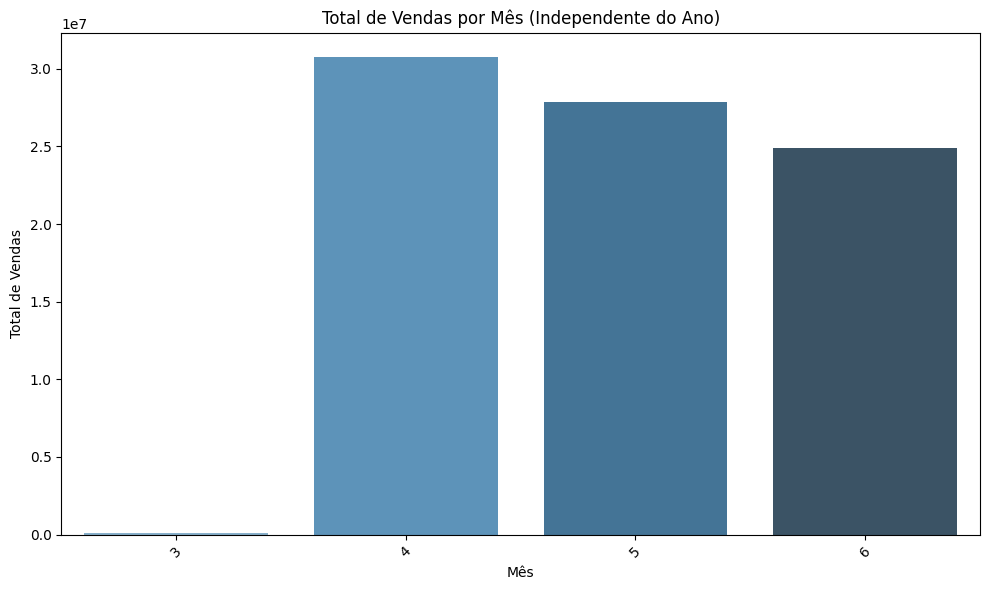

In [ ]:
# Agrupar por Mês, independentemente do ano
vendas_por_mes = df.groupby(df['Date'].dt.month)['Amount'].sum().reset_index()

# Renomear a coluna para facilitar o entendimento
vendas_por_mes.columns = ['Mês', 'Total Vendas']

# Plotar o gráfico de total de vendas por mês
plt.figure(figsize=(10, 6))
sns.barplot(data=vendas_por_mes, x='Mês', y='Total Vendas', palette='Blues_d')
plt.title('Total de Vendas por Mês (Independente do Ano)')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-200-2826d93b9a1e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vendas_categoria, x='Qty', y='Category', palette='viridis')


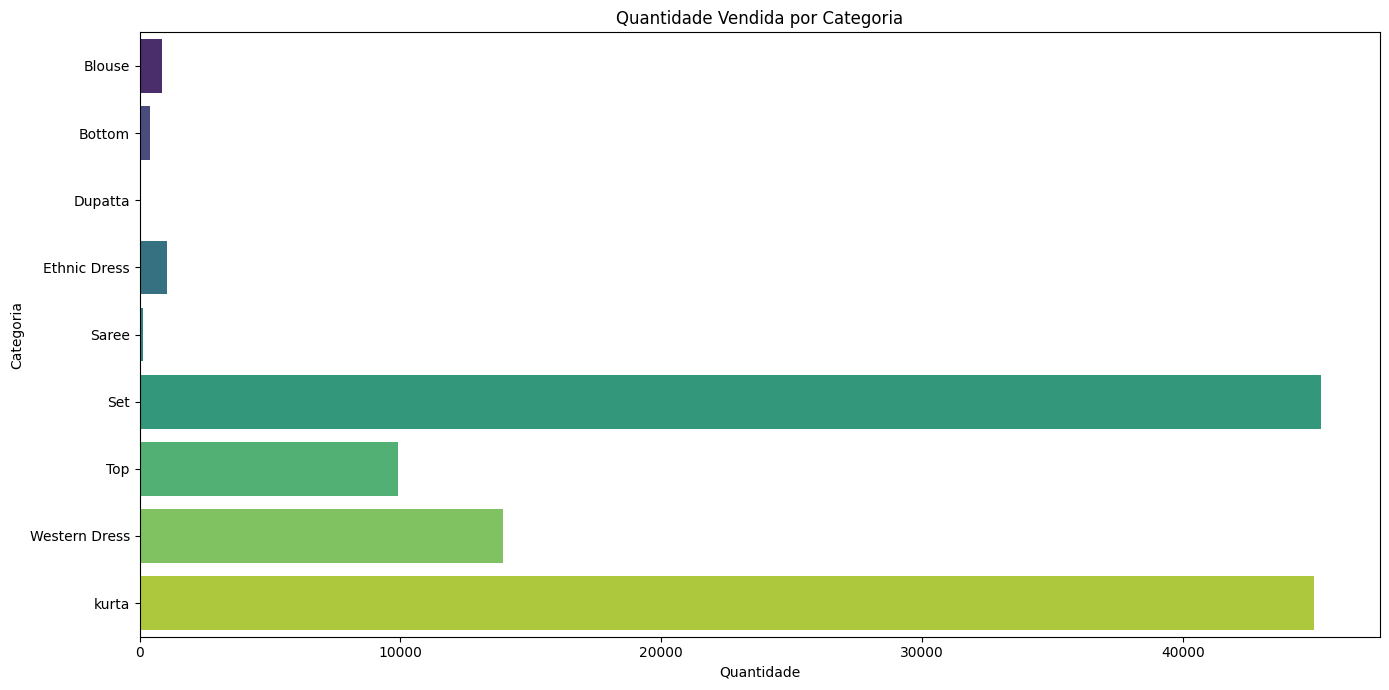

<ipython-input-200-2826d93b9a1e>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vendas_categoria, x='Amount', y='Category', palette='magma')


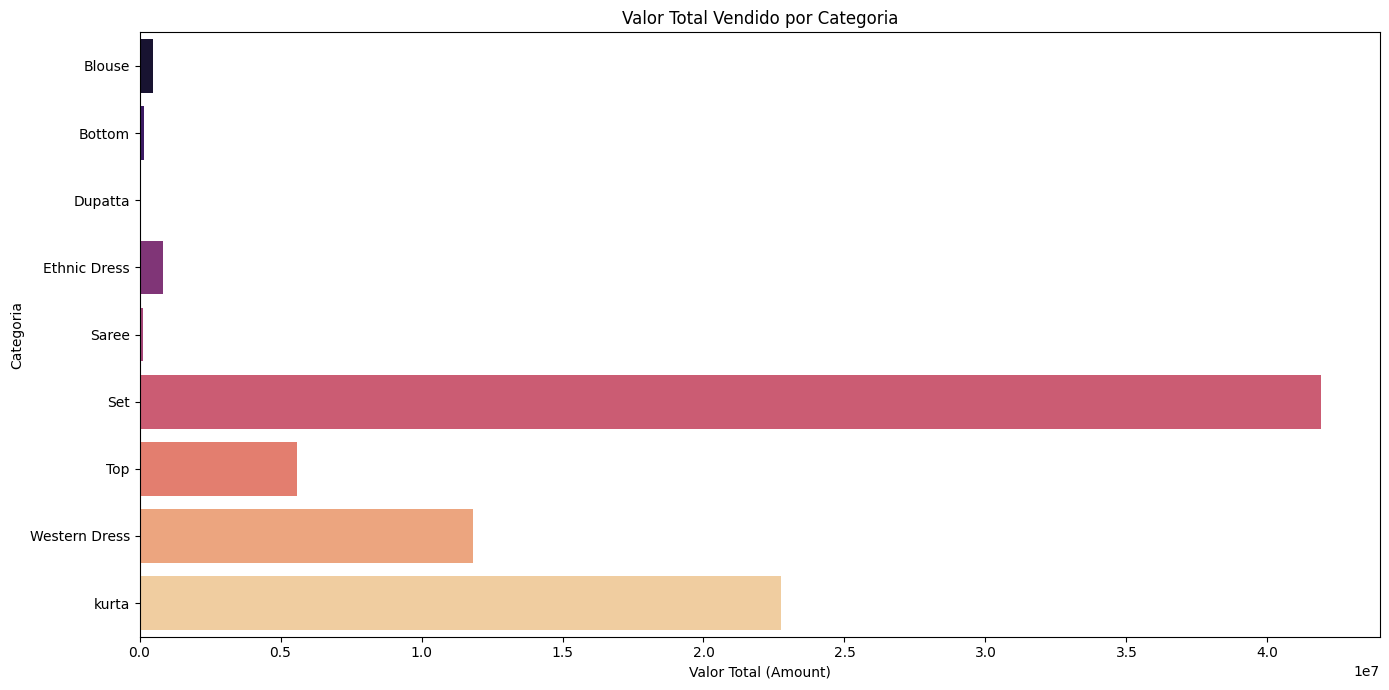

In [ ]:
# Agrupar por Categoria
vendas_categoria = df.groupby('Category').agg({'Qty': 'sum', 'Amount': 'sum'}).reset_index()

# Plotar Quantidade Vendida por Categoria
plt.figure(figsize=(14, 7))
sns.barplot(data=vendas_categoria, x='Qty', y='Category', palette='viridis')
plt.title('Quantidade Vendida por Categoria')
plt.xlabel('Quantidade')
plt.ylabel('Categoria')
plt.tight_layout()
plt.show()

# Plotar Valor Total Vendido por Categoria
plt.figure(figsize=(14, 7))
sns.barplot(data=vendas_categoria, x='Amount', y='Category', palette='magma')
plt.title('Valor Total Vendido por Categoria')
plt.xlabel('Valor Total (Amount)')
plt.ylabel('Categoria')
plt.tight_layout()
plt.show()


In [ ]:
df.rename(columns={'Sales Channel ': 'Sales Channel'},inplace=True)

<ipython-input-193-9ab84daff0ff>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=status_courier, x='Frequência', y='Courier Status', palette='pastel')


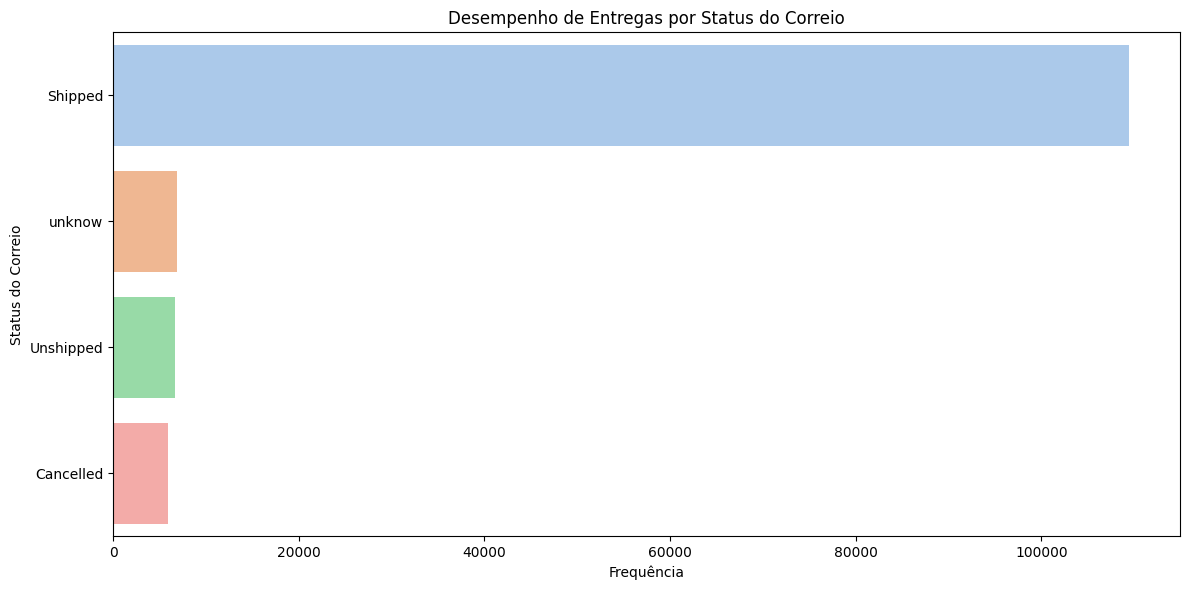

In [ ]:
# Contar a frequência de cada status
status_courier = df['Courier Status'].value_counts().reset_index()
status_courier.columns = ['Courier Status', 'Frequência']

# Plotar
plt.figure(figsize=(12, 6))
sns.barplot(data=status_courier, x='Frequência', y='Courier Status', palette='pastel')
plt.title('Desempenho de Entregas por Status do Correio')
plt.xlabel('Frequência')
plt.ylabel('Status do Correio')
plt.tight_layout()
plt.show()


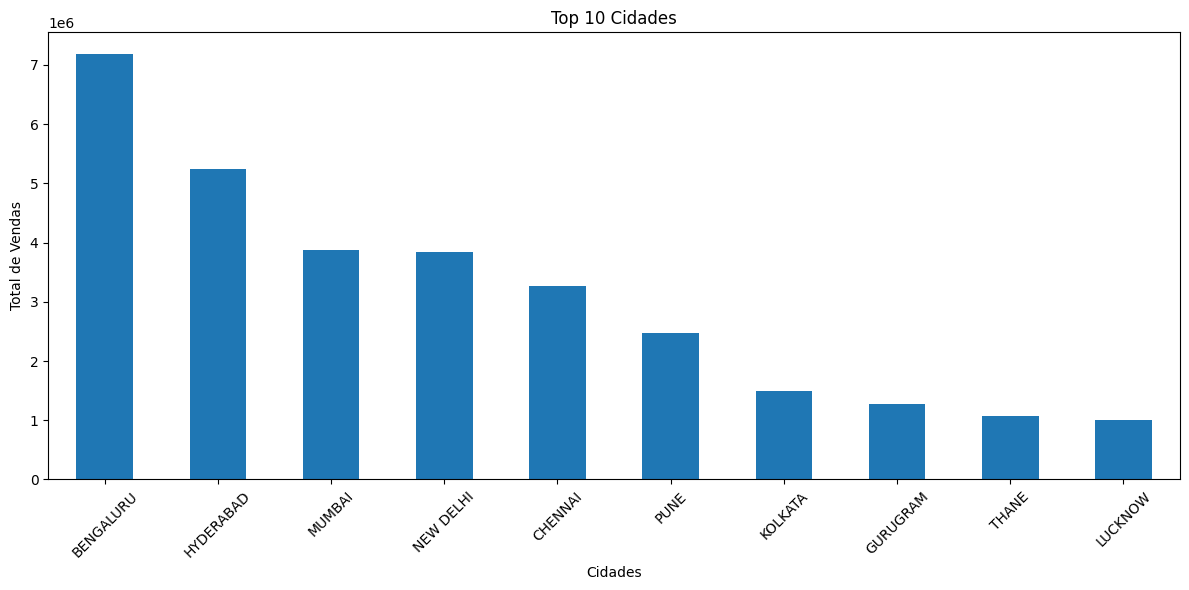

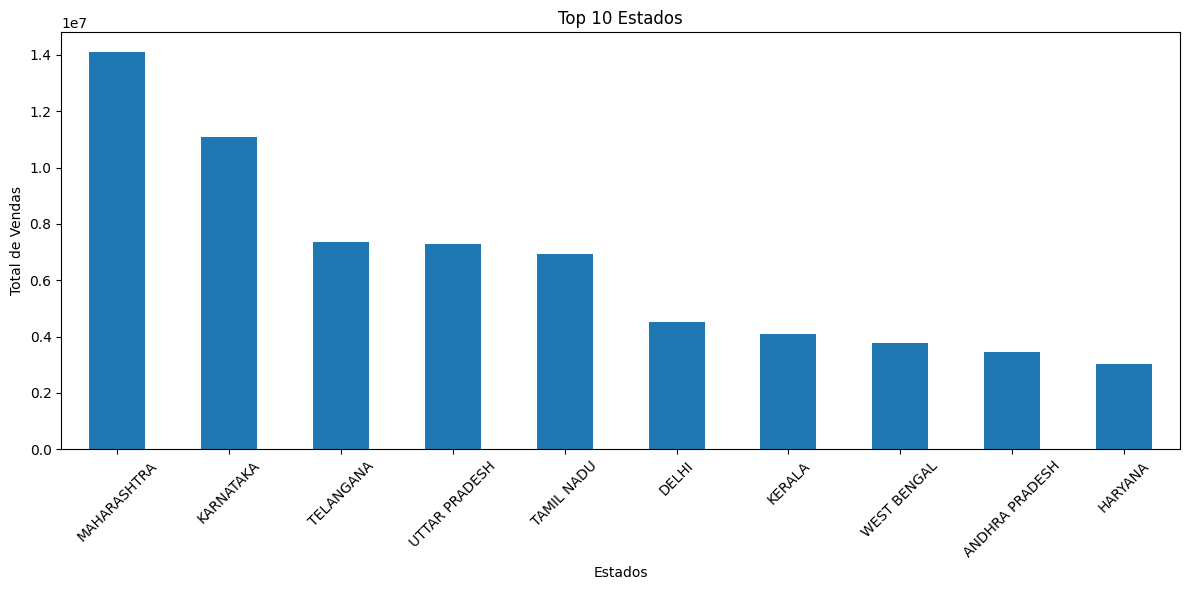

In [ ]:
def plot_sales_by_location(df, location_column, title):
    plt.figure(figsize=(12, 6))
    sales_by_location = df.groupby(location_column)['Amount'].sum().sort_values(ascending=False).head(10)
    sales_by_location.plot(kind='bar')
    plt.title(f'Top 10 {title}')
    plt.xlabel(title)
    plt.ylabel('Total de Vendas')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_sales_by_location(df, 'ship-city', 'Cidades')
plot_sales_by_location(df, 'ship-state', 'Estados')


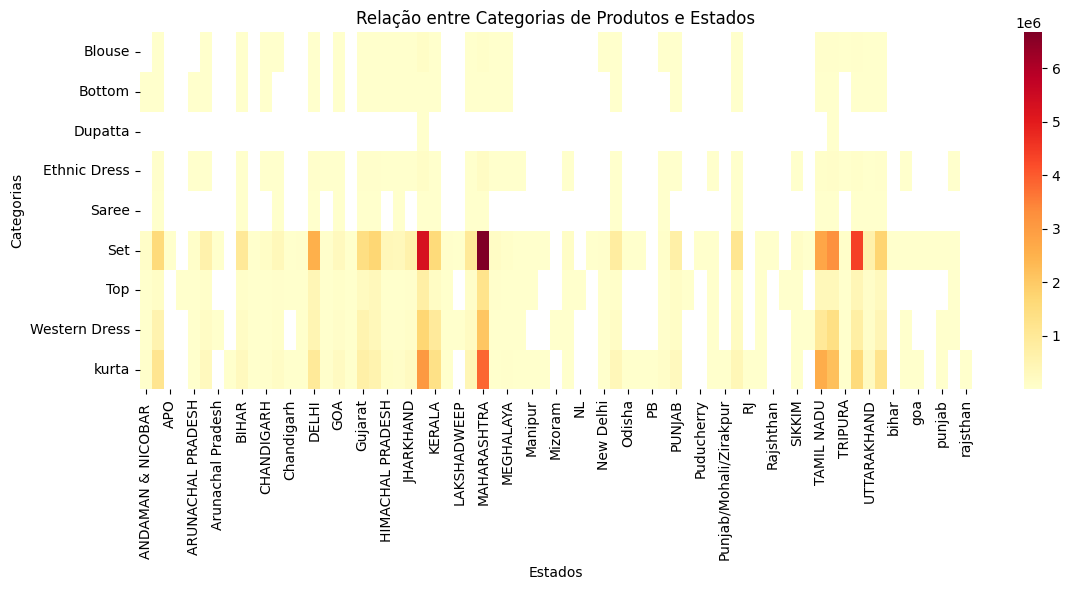

In [ ]:
plt.figure(figsize=(12, 6))
category_region = df.groupby(['Category', 'ship-state'])['Amount'].sum().unstack()
sns.heatmap(category_region, cmap='YlOrRd', annot=False)
plt.title('Relação entre Categorias de Produtos e Estados')
plt.xlabel('Estados')
plt.ylabel('Categorias')
plt.tight_layout()
plt.show()

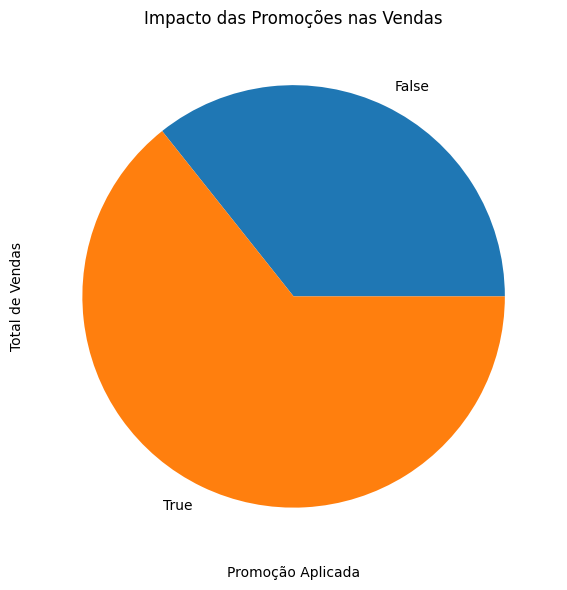

In [ ]:
plt.figure(figsize=(10, 6))
promo_impact = df.groupby('promotion-ids')['Amount'].sum()
promo_impact.plot(kind='pie')
plt.title('Impacto das Promoções nas Vendas')
plt.xlabel('Promoção Aplicada')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
